<a href="https://colab.research.google.com/github/Clonlyfan/Statistics-and-more/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math

def calculate_entropy(data):
    """Calculates the entropy of a dataset."""
    if len(data) == 0:
        return 0
    probabilities = data['Play Tennis'].value_counts(normalize=True)
    entropy = -sum(p * math.log2(p) for p in probabilities if p > 0)
    return entropy

def calculate_gini_impurity(data):
    """Calculates the Gini impurity of a dataset."""
    if len(data) == 0:
        return 0
    probabilities = data['Play Tennis'].value_counts(normalize=True)
    gini = 1 - sum(p**2 for p in probabilities)
    return gini

def calculate_information_gain(data, attribute):
    """Calculates the information gain of splitting data on a given attribute."""
    total_entropy = calculate_entropy(data)
    attribute_values = data[attribute].unique()
    weighted_entropy = 0

    for value in attribute_values:
        subset = data[data[attribute] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset)

    information_gain = total_entropy - weighted_entropy
    return information_gain

def calculate_gini_gain(data, attribute):
    """Calculates the Gini gain of splitting data on a given attribute."""
    total_gini = calculate_gini_impurity(data)
    attribute_values = data[attribute].unique()
    weighted_gini = 0

    for value in attribute_values:
        subset = data[data[attribute] == value]
        proportion = len(subset) / len(data)
        weighted_gini += proportion * calculate_gini_impurity(subset)

    gini_gain = total_gini - weighted_gini
    return gini_gain

# Load the data from the Excel file
file_path = "/content/gamedayornot.xlsx"
try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Calculate initial entropy and Gini impurity of the entire dataset
initial_entropy = calculate_entropy(df)
initial_gini = calculate_gini_impurity(df)

print(f"Initial Entropy of the dataset: {initial_entropy:.4f}")
print(f"Initial Gini Impurity of the dataset: {initial_gini:.4f}\n")

features = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# Calculate Information Gain for each feature
print("Information Gain for each feature:")
for feature in features:
    info_gain = calculate_information_gain(df, feature)
    print(f"Information Gain ({feature}): {info_gain:.4f}")
print("\n")

# Calculate Gini Gain for each feature
print("Gini Gain for each feature:")
for feature in features:
    gini_gain = calculate_gini_gain(df, feature)
    print(f"Gini Gain ({feature}): {gini_gain:.4f}")
print("\n")

# Detailed Explanation:

print("Detailed Explanation:\n")

print("1. Initial Entropy and Gini Impurity:")
print("   - **Entropy** measures the impurity or randomness in the target variable ('Play Tennis') of the entire dataset. A higher entropy value indicates more disorder, meaning the classes (Yes/No) are more mixed.")
print(f"     - Initial Entropy: {initial_entropy:.4f}")
print("   - **Gini Impurity** is another measure of impurity. It represents the probability of misclassifying a randomly chosen instance if it were randomly labeled according to the class distribution in the dataset. A higher Gini impurity also indicates more disorder.")
print(f"     - Initial Gini Impurity: {initial_gini:.4f}\n")

print("2. Information Gain:")
print("   - **Information Gain** quantifies the reduction in entropy achieved by splitting the dataset based on a particular feature. It tells us how much more 'organized' the target variable becomes after partitioning the data according to the values of that feature.")
print("   - For each feature ('Outlook', 'Temperature', 'Humidity', 'Wind'):")
print("     - We calculate the entropy of the 'Play Tennis' outcome for each unique value within that feature (e.g., for 'Outlook': Sunny, Overcast, Rainy).")
print("     - Then, we calculate a weighted average of these entropies, where the weights are the proportion of instances belonging to each value of the feature.")
print("     - The Information Gain is the difference between the initial entropy of the dataset and this weighted average entropy. A higher Information Gain suggests that the feature is more effective in classifying the 'Play Tennis' outcome.")
print("   - Based on the calculated Information Gains:")
for feature in features:
    info_gain = calculate_information_gain(df, feature)
    print(f"     - Information Gain ({feature}): {info_gain:.4f}")
print("\n")

print("3. Gini Gain:")
print("   - **Gini Gain** is analogous to Information Gain but uses Gini impurity instead of entropy. It measures the reduction in Gini impurity achieved by splitting the dataset on a particular feature.")
print("   - Similar to Information Gain, a higher Gini Gain for a feature indicates that splitting on that feature leads to a greater reduction in impurity in the resulting subsets, making it a potentially good feature for splitting in a decision tree.")
print("   - For each feature:")
for feature in features:
    gini_gain = calculate_gini_gain(df, feature)
    print(f"     - Gini Gain ({feature}): {gini_gain:.4f}")
print("\n")

print("In the context of building a decision tree:")
print("- The feature with the **highest Information Gain** (if using entropy as the splitting criterion) or the **highest Gini Gain** (if using Gini impurity) would typically be chosen as the root node of the tree.")
print("- This is because these features provide the most information about the target variable and lead to the most homogeneous (pure) child nodes after the split.")
print("- The process would then be recursively applied to the child nodes until a stopping criterion is met (e.g., all instances in a node belong to the same class, or a maximum tree depth is reached).")

Initial Entropy of the dataset: 1.2638
Initial Gini Impurity of the dataset: 0.5408

Information Gain for each feature:
Information Gain (Outlook): 0.5441
Information Gain (Temperature): 0.4441
Information Gain (Humidity): 0.4975
Information Gain (Wind): 0.3532


Gini Gain for each feature:
Gini Gain (Outlook): -0.0314
Gini Gain (Temperature): 0.1704
Gini Gain (Humidity): 0.2234
Gini Gain (Wind): 0.1380


Detailed Explanation:

1. Initial Entropy and Gini Impurity:
   - **Entropy** measures the impurity or randomness in the target variable ('Play Tennis') of the entire dataset. A higher entropy value indicates more disorder, meaning the classes (Yes/No) are more mixed.
     - Initial Entropy: 1.2638
   - **Gini Impurity** is another measure of impurity. It represents the probability of misclassifying a randomly chosen instance if it were randomly labeled according to the class distribution in the dataset. A higher Gini impurity also indicates more disorder.
     - Initial Gini Impurity


Decision Tree (Entropy):


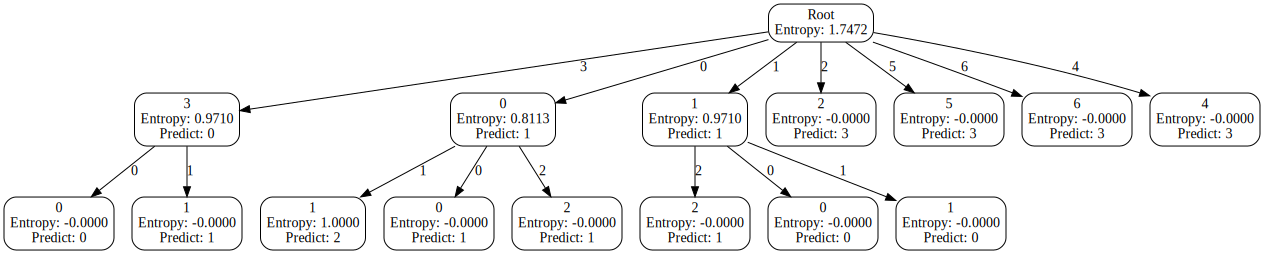


Decision Tree (Gini):


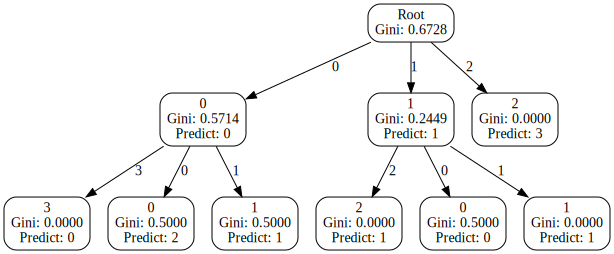


Detailed Explanation:

1. Initial Impurity Measures:
   - **Initial Entropy:** 1.7472
   - **Initial Gini Impurity:** 0.6728

2. Information Gain and Gini Gain Calculation:
   - Information Gain for each feature: {'Outlook': 1.0274661727300884, 'Temperature': 0.927451224964519, 'Humidity': 0.9808786470580716, 'Wind': 0.8365916681089789}
   - Gini Gain for each feature: {'Outlook': 0.3228395061728395, 'Temperature': 0.30246913580246915, 'Humidity': 0.35537918871252205, 'Wind': 0.2700617283950617} 

3. Building the Decision Tree for Plotting:
   - The `build_decision_tree_for_plotting` function now directly creates a `graphviz.Digraph` object.
   - It recursively selects the best feature to split on based on the chosen criterion.
   - For each split, it adds nodes and edges to the `graph` object, labeling them with the feature, the split value, and the impurity at that node.
   - Leaf nodes (at the maximum depth or when pure) will show the predicted majority class.

4. Displaying the De

In [4]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from graphviz import Digraph
from sklearn import tree  # For export_graphviz (though we'll adapt)
from sklearn.preprocessing import LabelEncoder

def calculate_entropy(data):
    """Calculates the entropy of a dataset."""
    if len(data) == 0:
        return 0
    probabilities = data['Play Tennis'].value_counts(normalize=True)
    entropy = -sum(p * math.log2(p) for p in probabilities if p > 0)
    return entropy

def calculate_gini_impurity(data):
    """Calculates the Gini impurity of a dataset."""
    if len(data) == 0:
        return 0
    probabilities = data['Play Tennis'].value_counts(normalize=True)
    gini = 1 - sum(p**2 for p in probabilities)
    return gini

def calculate_information_gain(data, attribute):
    """Calculates the information gain of splitting data on a given attribute."""
    total_entropy = calculate_entropy(data)
    attribute_values = data[attribute].unique()
    weighted_entropy = 0

    for value in attribute_values:
        subset = data[data[attribute] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset)

    information_gain = total_entropy - weighted_entropy
    return information_gain

def calculate_gini_gain(data, attribute):
    """Calculates the Gini gain of splitting data on a given attribute."""
    total_gini = calculate_gini_impurity(data)
    attribute_values = data[attribute].unique()
    weighted_gini = 0

    for value in attribute_values:
        subset = data[data[attribute] == value]
        proportion = len(subset) / len(data)
        weighted_gini += proportion * calculate_gini_impurity(subset)

    gini_gain = total_gini - weighted_gini
    return gini_gain

def build_decision_tree_for_plotting(data, features, target='Play Tennis', criterion='entropy', depth=0, max_depth=None, parent_name=None, edge_label=None, graph=None):
    """Recursively builds a decision tree and adds nodes/edges to a graphviz Digraph."""
    if graph is None:
        graph = Digraph(comment='Decision Tree')
        graph.attr('node', shape='box', style='rounded')

    # Create current node label
    if parent_name is None:
        node_name = 'root'
        impurity = calculate_entropy(data) if criterion == 'entropy' else calculate_gini_impurity(data)
        graph.node(node_name, f"Root\n{criterion.capitalize()}: {impurity:.4f}")
    else:
        impurity = calculate_entropy(data) if criterion == 'entropy' else calculate_gini_impurity(data)
        class_counts = Counter(data[target])
        majority_class = class_counts.most_common(1)[0][0]
        node_name = f"{parent_name}_{edge_label}_{depth}"
        graph.node(node_name, f"{edge_label}\n{criterion.capitalize()}: {impurity:.4f}\nPredict: {majority_class}")
        graph.edge(parent_name, node_name, label=edge_label)

    if len(data[target].unique()) == 1 or not features or (max_depth is not None and depth >= max_depth):
        return graph

    if criterion == 'entropy':
        gains = {feature: calculate_information_gain(data, feature) for feature in features}
        if not gains:  # No more features with gain
            return graph
        best_feature = max(gains, key=gains.get)
    else:  # criterion == 'gini'
        gains = {feature: calculate_gini_gain(data, feature) for feature in features}
        if not gains:  # No more features with gain
            return graph
        best_feature = max(gains, key=gains.get)

    remaining_features = [f for f in features if f != best_feature]

    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        graph = build_decision_tree_for_plotting(subset, remaining_features, target, criterion, depth + 1, max_depth, node_name, str(value), graph)

    return graph

# Load the data from the Excel file
file_path = "/content/gamedayornot.xlsx"
try:
    df = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# --- Preprocessing for direct plotting (optional but can improve clarity) ---
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Separate features and target
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']
feature_names = list(X.columns)
class_names = y.unique().astype(str).tolist()

# Build and plot the decision tree using Entropy
tree_entropy_graph = build_decision_tree_for_plotting(df.copy(), feature_names, max_depth=2, criterion='entropy')
print("\nDecision Tree (Entropy):")
try:
    from IPython.display import display
    display(tree_entropy_graph)
except ImportError:
    print("IPython not available, cannot display graph directly. Save to file:")
    tree_entropy_graph.render('decision_tree_entropy', view=True)

# Build and plot the decision tree using Gini Impurity
tree_gini_graph = build_decision_tree_for_plotting(df.copy(), feature_names, max_depth=2, criterion='gini')
print("\nDecision Tree (Gini):")
try:
    from IPython.display import display
    display(tree_gini_graph)
except ImportError:
    print("IPython not available, cannot display graph directly. Save to file:")
    tree_gini_graph.render('decision_tree_gini', view=True)

# --- Detailed Explanation (remains largely the same) ---

print("\nDetailed Explanation:\n")

print("1. Initial Impurity Measures:")
initial_entropy = calculate_entropy(df[['Play Tennis']])
initial_gini = calculate_gini_impurity(df[['Play Tennis']])
print(f"   - **Initial Entropy:** {initial_entropy:.4f}")
print(f"   - **Initial Gini Impurity:** {initial_gini:.4f}\n")

print("2. Information Gain and Gini Gain Calculation:")
info_gains = {feature: calculate_information_gain(df, feature) for feature in feature_names}
gini_gains = {feature: calculate_gini_gain(df, feature) for feature in feature_names}
print("   - Information Gain for each feature:", info_gains)
print("   - Gini Gain for each feature:", gini_gains, "\n")

print("3. Building the Decision Tree for Plotting:")
print("   - The `build_decision_tree_for_plotting` function now directly creates a `graphviz.Digraph` object.")
print("   - It recursively selects the best feature to split on based on the chosen criterion.")
print("   - For each split, it adds nodes and edges to the `graph` object, labeling them with the feature, the split value, and the impurity at that node.")
print("   - Leaf nodes (at the maximum depth or when pure) will show the predicted majority class.\n")

print("4. Displaying the Decision Tree:")
print("   - The resulting `graphviz.Digraph` object is then displayed using `IPython.display.display(graph)`. If you are not in an IPython environment (like Colab), it will attempt to save the graph to a file (e.g., 'decision_tree_entropy.pdf').\n")

print("5. Interpreting the Decision Tree Plot:")
print("   - The root node represents the initial decision based on the feature with the highest gain.")
print("   - Each edge represents a value of the splitting feature.")
print("   - Internal nodes represent further decisions.")
print("   - Leaf nodes show the predicted class ('0' or '1' in this encoded example, which you can map back using `label_encoders['Play Tennis'].classes_`).")
print("   - The impurity (Entropy or Gini) is shown at each node, decreasing as you go down the tree (ideally).")

print("\nFurther Steps:")
print("- You can increase the `max_depth` parameter in `build_decision_tree_for_plotting` to see a deeper tree.")
print("- For a more detailed tree, you might need to handle categorical features more explicitly within the splitting logic if the simple label encoding isn't sufficient for your understanding.")